**Problem Statement**-To predict, whether the customer would be interested in Vehicle insurance,


**Variable Definition**

**id**:Unique ID for the customer

**Gender**:Gender of the customer

**Age**:Age of the customer

**Driving_License**	:0-Customer does not have DL, 1-Customer already has DL

**Region_Code**:	Unique code for the region of the customer

**Previously_Insured**	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

**Vehicle_Age** :	Age of the Vehicle 

**Vehicle_Damage**
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.

**Annual_Premium**	:The amount customer needs to pay as premium in the year

**Policy_Sales_Channel**:Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

**Vintage**	Number of Days, Customer has been associated with the company

**Response**	1 :  Customer is interested, 0 : Customer is not interested

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
#first five rows
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#checking for null values
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
#data shape
train_data.shape,test_data.shape

((381109, 12), (127037, 11))

In [6]:
train_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

# ANALYSIS

-Response

In [7]:
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

([<matplotlib.patches.Wedge at 0x14c0267a108>,
 [Text(-0.41316006818238765, -1.0194600325954544, '0'),
  Text(0.45072007438078676, 1.1121382173768593, '1')],
 [Text(-0.22536003719039324, -0.5560691086884296, '87.7%'),
  Text(0.26292004338879227, 0.6487472934698346, '12.3%')])

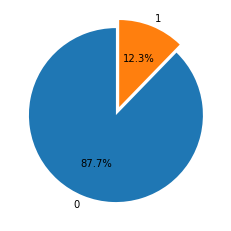

In [8]:
explode =(0,0.1) 
Label=[0,1]                           
plt.pie(train_data['Response'].value_counts(),labels=Label,explode = explode, startangle=90, autopct='%.1f%%') 

**INFERENCE**
We can see only 12.3% people are interested

In [9]:
def uni_biv_analysis(data,feature):
    plt.figure(figsize = (12,4), dpi=140)
    plt.subplot(1,2,1)
    sns.countplot(feature,data=data)
    plt.title("{} Count".format(feature))
    
    plt.subplot(1,2,2)
    sns.countplot(x=feature, hue='Response', data=data,palette="Set3")
    plt.title('{} interest count'.format(feature))

-id

In [10]:
train_data['id'].nunique()      # each row represents unique customer

381109

-Gender

In [11]:
train_data['Gender'].value_counts() /train_data.shape[0]*100  # 54% customers are males

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

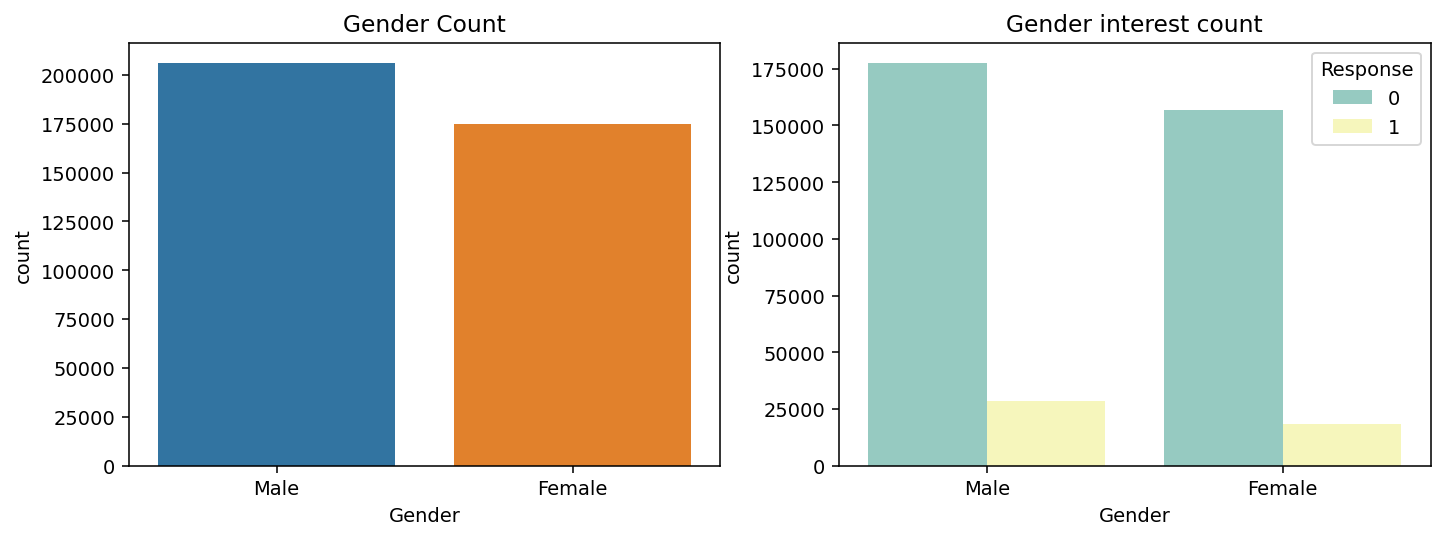

In [12]:
uni_biv_analysis(train_data,'Gender')

-Age of the customer

In [13]:
train_data['Age'].min(),train_data['Age'].max()      # min age of customer in dataset is 20 and max is 85

(20, 85)

<AxesSubplot:xlabel='Age'>

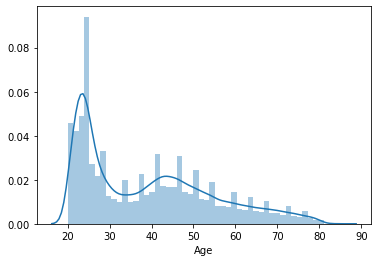

In [14]:
sns.distplot(train_data['Age']) 

-Driving Licence

In [15]:
train_data['Driving_License'].value_counts() /train_data.shape[0]*100  #almost every one has driving licence(99.7%)

1    99.786938
0     0.213062
Name: Driving_License, dtype: float64

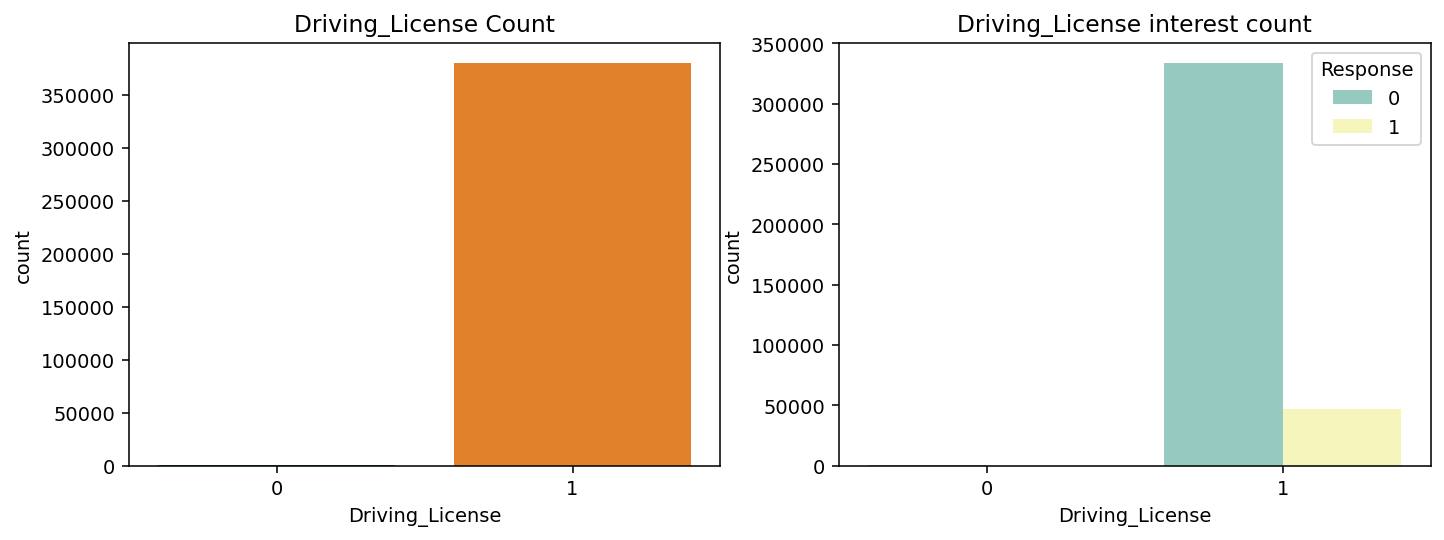

In [16]:
uni_biv_analysis(train_data,'Driving_License')

-Region Code

In [17]:
train_data['Region_Code'].nunique()

53

-Previously_Insured

In [18]:
train_data['Previously_Insured'].value_counts() /train_data.shape[0]*100 # 45.8% customers already have vehicle insurance

0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64

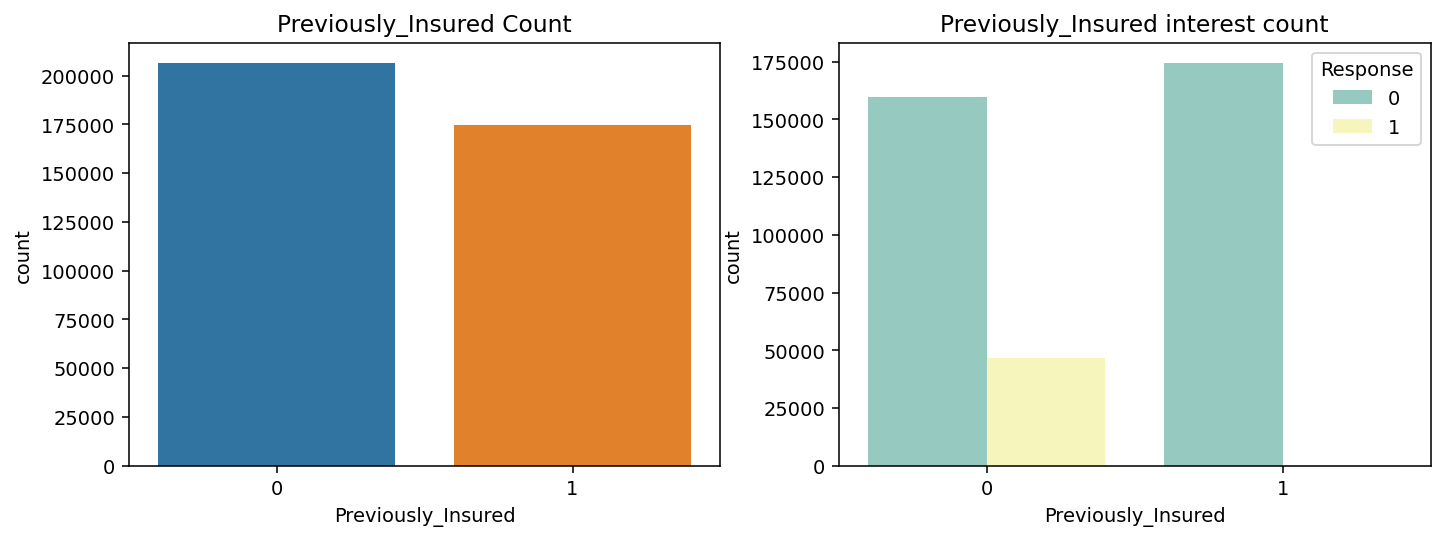

In [19]:
uni_biv_analysis(train_data,'Previously_Insured')   # as we can see customers who already have insurance will not be interested again

-Vehicle Age

In [20]:
train_data['Vehicle_Age'].value_counts() /train_data.shape[0]*100

1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64

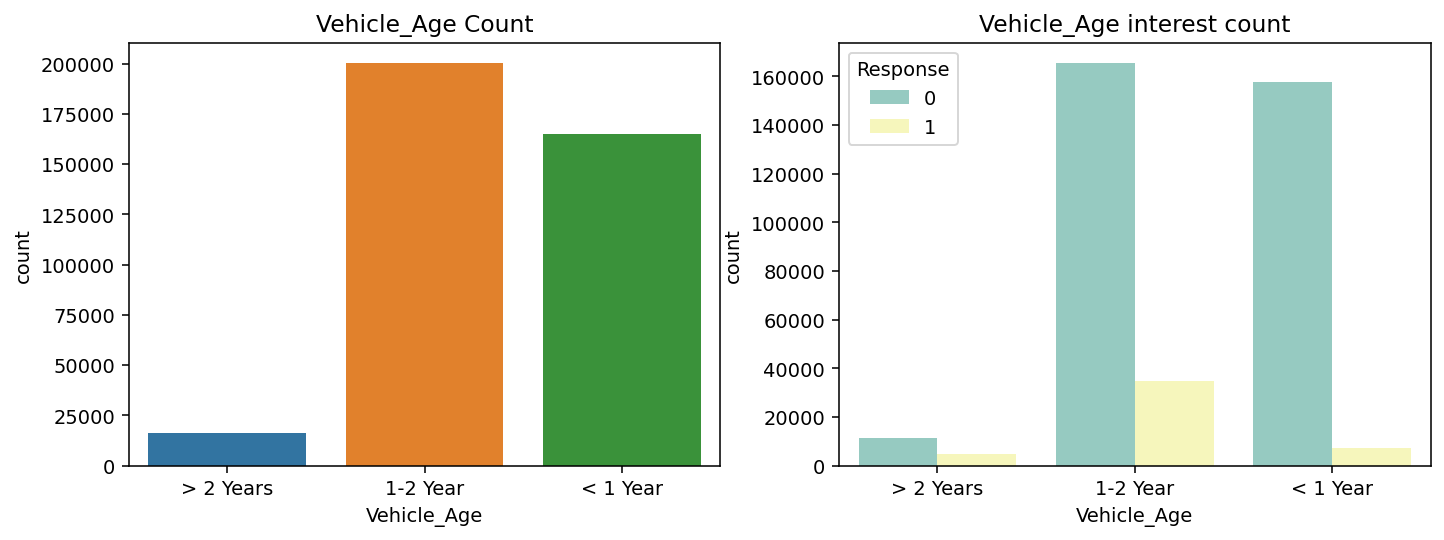

In [21]:
uni_biv_analysis(train_data,'Vehicle_Age') #customers whose vehicle age is 1-2 are more

-Vehicle_Damage

In [22]:
train_data['Vehicle_Damage'].value_counts() /train_data.shape[0]*100

Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64

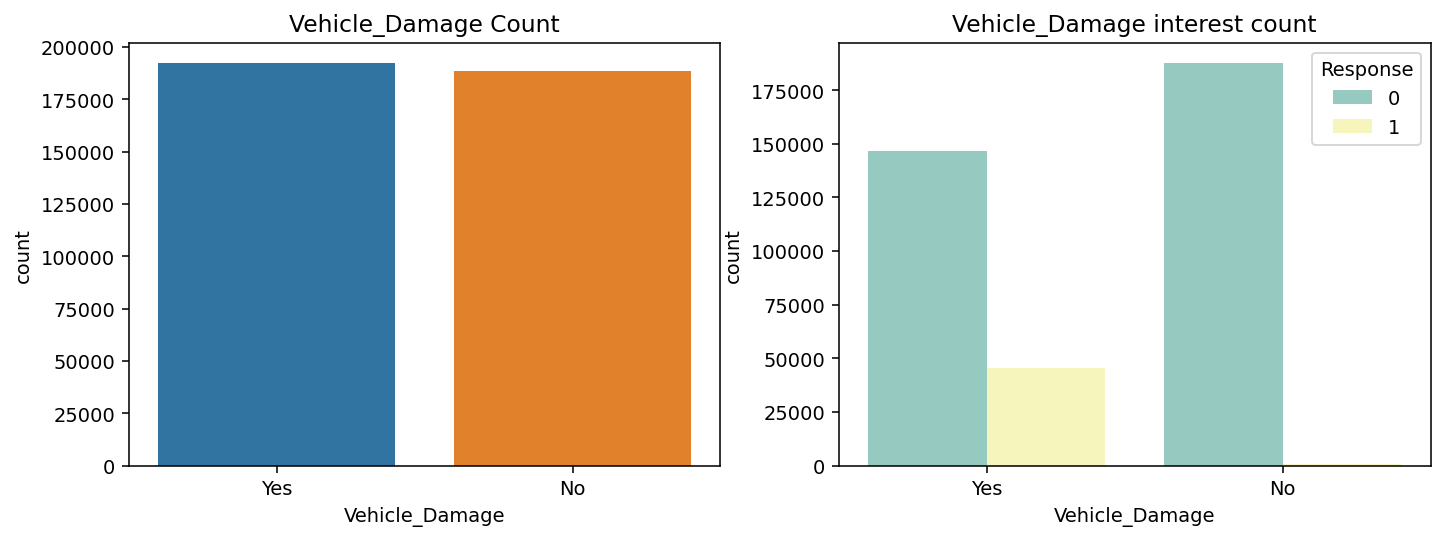

In [23]:
uni_biv_analysis(train_data,'Vehicle_Damage')  #we can see people who does not have their vehicle damaged in the past are not interested in insurance

-Annual_Premium

In [24]:
train_data['Annual_Premium'].value_counts()  #maximum customers has to pay 2630 as annual premium

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

<AxesSubplot:xlabel='Annual_Premium'>

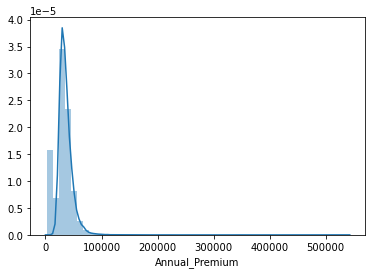

In [25]:
sns.distplot(train_data['Annual_Premium'])   #positively skewed data  #we may use log tanformation

-Policy_Sales_Channel

In [26]:
train_data['Policy_Sales_Channel'].nunique() #there are 155 codes avaiable in policy sales channel

155

-Vintage

In [27]:
train_data['Vintage'].nunique()

290

In [28]:
train_data[train_data['Vintage']>365]   #It's been less than year cutomers are associated with the company

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


<AxesSubplot:>

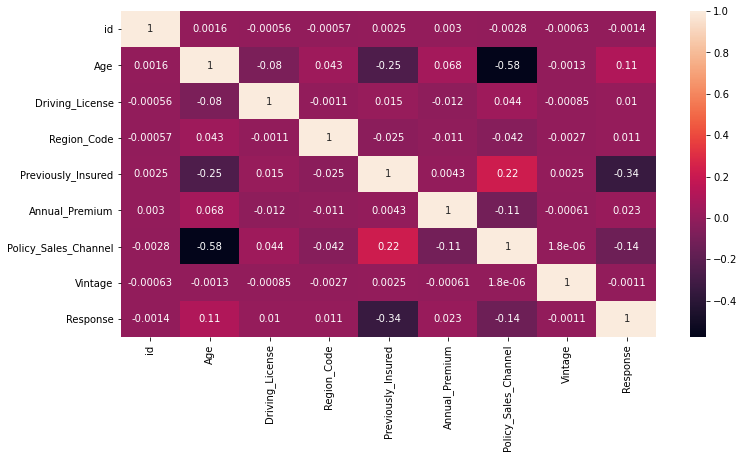

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.corr(),annot=True)

In [30]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# FEATURE ENGINEERING ON TRAINING DATA

--Label Encoding of Vehicle_Damage

In [31]:
train_data['Vehicle_Damage']=train_data['Vehicle_Damage'].map({'Yes':1,'No':0})
test_data['Vehicle_Damage']=test_data['Vehicle_Damage'].map({'Yes':1,'No':0})

--Label Encoding of Vehicle_Age

In [32]:
train_data['Vehicle_Age']=train_data['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test_data['Vehicle_Age']=test_data['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})  ##ENCODING

--Creating new feature age_range

In [33]:
bins = [20, 31, 41, 51, 61, 71,80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '70+']
train_data['age_range'] = pd.cut(train_data.Age, bins, labels = labels,include_lowest = True)
test_data['age_range'] = pd.cut(test_data.Age, bins, labels = labels,include_lowest = True)

<AxesSubplot:xlabel='age_range', ylabel='count'>

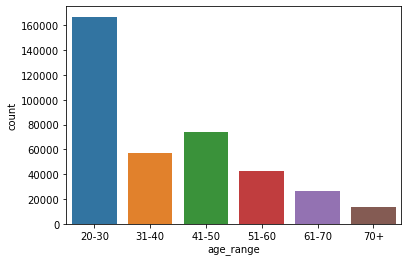

In [34]:
sns.countplot(train_data['age_range'])

--Label Encoding of Age_range

In [35]:
##LAbel encoding of bins
train_data['age_range']=train_data['age_range'].map({'20-30':0,'31-40':1,'41-50':2,'51-60':3,'61-70':4,'70+':5})
test_data['age_range']=test_data['age_range'].map({'20-30':0,'31-40':1,'41-50':2,'51-60':3,'61-70':4,'70+':5})

--Creating new feature Vintage years from vintage(days)

In [36]:
train_data['vintage_year']=train_data['Vintage'].apply(lambda x:round(x/365,2))
test_data['vintage_year']=test_data['Vintage'].apply(lambda x:round(x/365,2))

--Log Tranformation of Annual_Premium

In [37]:
train_data['Annual_Premium']=np.log(train_data['Annual_Premium'])
test_data['Annual_Premium']=np.log(test_data['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium'>

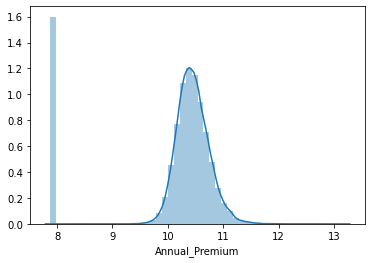

In [38]:
sns.distplot(train_data['Annual_Premium'])

**For Modelling**

In [39]:
train_data['Region_Code'].nunique(),test_data['Region_Code'].nunique()

(53, 53)

In [40]:
train_data['Policy_Sales_Channel'].nunique(),test_data['Policy_Sales_Channel'].nunique()

(155, 145)

In [41]:
n=set(train_data['Policy_Sales_Channel'].unique())
p=set(test_data['Policy_Sales_Channel'].unique())

In [42]:
q=n.difference(p)

In [43]:
len(q)

12

In [44]:
q1=p.difference(n)

In [45]:
q1    #values in test but not in train

{141.0, 142.0}

In [46]:
q    # values in train but not in test

{27.0, 28.0, 41.0, 50.0, 67.0, 68.0, 75.0, 84.0, 104.0, 143.0, 144.0, 149.0}

### FREQUENCY ENCODING OF Region_Code,Policy_Sales_Channel

In [47]:
cols=['Region_Code','Policy_Sales_Channel']
for i in cols:
    fq=train_data.groupby(i).size()/len(train_data)
    train_data.loc[:, "{}_freq_encode".format(i)] = train_data[i].map(fq) 

In [48]:
cols=['Region_Code','Policy_Sales_Channel']
for i in cols:
    fq=test_data.groupby(i).size()/len(test_data)
    test_data.loc[:, "{}_freq_encode".format(i)] = test_data[i].map(fq) 

# SCALING

**SCALING OF TRAINING AND TESTING...**

In [49]:
ss=StandardScaler()
col=['Annual_Premium','Vintage','vintage_year']
for i in col:
    train_data[i]=ss.fit_transform(train_data[i].values.reshape(-1,1))
    test_data[i]=ss.fit_transform(test_data[i].values.reshape(-1,1))
    


Need dummy variables for Region_Code,Policy_Sales_Channel,Gender,Driving_License,Previously_Insured,Vehicle_Damage.

### GET DUMMIES

In [50]:
test_data=pd.get_dummies(data=test_data,columns=['Gender','Driving_License','Previously_Insured','Vehicle_Damage'],drop_first=True)

In [51]:
train_data=pd.get_dummies(data=train_data,columns=['Gender','Driving_License','Previously_Insured','Vehicle_Damage'],drop_first=True)

In [52]:
train_data.columns

Index(['id', 'Age', 'Region_Code', 'Vehicle_Age', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'age_range',
       'vintage_year', 'Region_Code_freq_encode',
       'Policy_Sales_Channel_freq_encode', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Damage_1'],
      dtype='object')

In [53]:
train_data=train_data[['id', 'Age', 'Region_Code', 'Vehicle_Age', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'age_range',
       'vintage_year', 'Region_Code_freq_encode',
       'Policy_Sales_Channel_freq_encode', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Damage_1', 'Response']]

In [54]:
train_data.to_csv('train_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

**LOADING CLEANED DATASETS**

In [2]:
train_cleaned_data=pd.read_csv('train_data.csv')
test_cleaned_data=pd.read_csv('test_data.csv')

In [3]:
train_cleaned_data.head()

,id,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,age_range,vintage_year,Region_Code_freq_encode,Policy_Sales_Channel_freq_encode,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Damage_1,Response
0,1,44,28.0,2,0.590228,26.0,0.748795,2.0,0.728859,0.279225,0.209127,1,1,0,1,1
1,2,76,3.0,1,0.403629,26.0,0.342443,5.0,0.336319,0.024274,0.209127,1,1,0,0,0
2,3,47,28.0,2,0.535633,26.0,-1.521998,2.0,-1.539146,0.279225,0.209127,1,1,0,1,1
3,4,21,11.0,0,0.245882,152.0,0.581474,0.0,0.598012,0.024224,0.353663,1,1,1,0,0
4,5,29,41.0,0,0.206054,152.0,-1.378580,0.0,-1.364684,0.047921,0.353663,0,1,1,0,0


In [4]:
test_cleaned_data.head()

,id,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,age_range,vintage_year,Region_Code_freq_encode,Policy_Sales_Channel_freq_encode,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Damage_1
0,381110,25,11.0,0,0.469212,152.0,-1.211054,0.0,-1.189891,0.024371,0.352173,1,1,1,0
1,381111,40,28.0,1,0.411253,7.0,-0.517782,1.0,-0.535626,0.279619,0.004400,1,1,0,1
2,381112,47,28.0,1,0.581277,124.0,0.534079,2.0,0.554815,0.279619,0.191314,1,1,0,1
3,381113,24,27.0,0,0.511955,152.0,0.390643,0.0,0.380345,0.006990,0.352173,1,1,1,1
4,381114,27,28.0,0,0.968578,152.0,1.705469,0.0,1.688875,0.279619,0.352173,1,1,1,0


**Inference**

We can drop id,Age,Region code, Policy Sales channel for modelling

# MODELLING

In [5]:
x = train_cleaned_data.drop(['Response','id','Region_Code','Age','Policy_Sales_Channel'],axis=1)
y = train_cleaned_data['Response']

In [6]:
test_X=test_cleaned_data.drop(['id','Region_Code','Age','Policy_Sales_Channel'],axis=1)

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=101, test_size=0.25, stratify=y)

In [8]:
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
x_valid.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
x_valid.fillna(0.0, inplace=True)

In [11]:
x_train.fillna(0.0, inplace=True)

In [12]:
test_X.replace([np.inf, -np.inf], np.nan, inplace=True)
test_X.fillna(0.0, inplace=True)

**LOGISTIC REGRESSION**

In [13]:
logreg = LogisticRegression(class_weight= 'balanced',random_state=101)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(roc_auc_score(y_train,logreg.predict_proba(x_train)[:,1]))
# print(roc_auc_score(y_val,lg.predict_proba(X_val)[:,1]))

0.8330571942175571


In [15]:
pred_log=logreg.predict_proba(test_X)[:,1]

In [16]:
pred_log

array([0.00369959, 0.8021575 , 0.74752941, ..., 0.00386978, 0.00473155,
       0.0071377 ])

In [17]:
print(roc_auc_score(y_valid,logreg.predict_proba(x_valid)[:,1]))

0.8333608527382695


In [18]:
id_sample=test_cleaned_data['id']

In [19]:
log_df=pd.DataFrame({'id':id_sample,'Response':pred_log})

In [20]:
log_df.set_index('id',inplace=True)

In [21]:
log_df

,Response
id,
381110,0.003700
381111,0.802158
381112,0.747529
381113,0.028071
381114,0.004824
...,...
508142,0.003294
508143,0.777523
508144,0.003870


In [27]:
log_df.to_csv('Sub1.csv')

**LOGISTIC WITH CV**

In [22]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [23]:
log_reg = LogisticRegression()
parameter_grid = {'penalty' : ["l1", "l2"],'C': np.arange(0.1, 3, 0.1),}
cross_validation = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
grid_search = GridSearchCV(log_reg, param_grid = parameter_grid,scoring='roc_auc',
                          cv = cross_validation)

In [24]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_j

In [25]:
print(roc_auc_score(y_train,grid_search.predict_proba(x_train)[:,1]))

0.8333512139959767


In [26]:
print(roc_auc_score(y_valid,grid_search.predict_proba(x_valid)[:,1]))

0.8337959539919254


# With Decision Trees

In [29]:
train_score=[]
validation_score=[]
for depth in range(1,50):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=101,class_weight='balanced')
    dt_model.fit(x_train, y_train)
    train_score.append(roc_auc_score(y_train, dt_model.predict_proba(x_train)[:,1]))
    validation_score.append(roc_auc_score(y_valid,dt_model.predict_proba(x_valid)[:,1]))

In [31]:
##Tuned Depth 
frame = pd.DataFrame({'max_depth':range(1,50), 'train_score':train_score,'valid_score':validation_score})
frame.head()

,max_depth,train_score,valid_score
0,1,0.770544,0.769015
1,2,0.789386,0.789221
2,3,0.809844,0.809413
3,4,0.821939,0.822502
4,5,0.831084,0.831458
5,6,0.838486,0.838424
6,7,0.844914,0.844068
7,8,0.848794,0.845491
8,9,0.851345,0.845958
9,10,0.854162,0.844613


Lets fix depth at 9

In [47]:
#Tune min saple split
train_score=[]
validation_score=[]
for min_samples in range(4,80):
    dt_model = DecisionTreeClassifier(max_depth=9,min_samples_split=min_samples, random_state=101,class_weight='balanced')
    dt_model.fit(x_train, y_train)
    train_score.append(roc_auc_score(y_train, dt_model.predict_proba(x_train)[:,1]))
    validation_score.append(roc_auc_score(y_valid,dt_model.predict_proba(x_valid)[:,1]))

In [47]:
frame = pd.DataFrame({'min_sample_split':range(4,80), 'train_score':train_score,'valid_score':validation_score})
frame[frame['valid_score']>0.8465]

,min_sample_split,train_score,valid_score
74,78,0.850941,0.846533
75,79,0.850941,0.846533


In [48]:
##MAx Features
train_score=[]
validation_score=[]
for max_features in range(3,12):
    dt_model = DecisionTreeClassifier(max_depth=9,min_samples_split=74,max_features=max_features,random_state=101,class_weight='balanced')
    dt_model.fit(x_train, y_train)
    train_score.append(roc_auc_score(y_train, dt_model.predict_proba(x_train)[:,1]))
    validation_score.append(roc_auc_score(y_valid,dt_model.predict_proba(x_valid)[:,1]))

In [50]:
frame = pd.DataFrame({'max_features':range(3,12), 'train_score':train_score,'valid_score':validation_score})
frame[frame['valid_score']>0.8465]

,max_features,train_score,valid_score
4,7,0.851320,0.847560
6,9,0.851089,0.846593
7,10,0.850848,0.847016


**DT WITH TUNED PARAMETERS**

In [61]:
#creating the decision tree function
dt_model_final= DecisionTreeClassifier(criterion='gini',max_depth=9,max_features=7,min_samples_split=78,random_state=101,class_weight='balanced')

In [62]:
dt_model_final.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=9, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=78,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [63]:
print(roc_auc_score(y_train, dt_model_final.predict_proba(x_train)[:,1]))

0.8514529904853865


In [64]:
print(roc_auc_score(y_valid,dt_model_final.predict_proba(x_valid)[:,1]))

0.8471374234748854


In [65]:
pred_dt=dt_model_final.predict_proba(test_X)[:,1]

In [66]:
id_sample=test_cleaned_data['id']

In [67]:
dt_df=pd.DataFrame({'id':id_sample,'Response':pred_dt})

In [68]:
dt_df.set_index('id',inplace=True)

In [69]:
dt_df.to_csv('Sub2.csv')

**WITH RANDOM FOREST**

In [35]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [49]:
#creating a random forest instance
clf = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=9,max_features=7,min_samples_split=78,random_state=101,class_weight='balanced')

In [50]:
#train the model
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=78,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [51]:
print(roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]))

0.8545232296110974


In [52]:
print(roc_auc_score(y_valid,clf.predict_proba(x_valid)[:,1]))

0.8511224946757122


In [53]:
pred_random_entr=clf.predict_proba(test_X)[:,1]

In [54]:
id_sample=test_cleaned_data['id']

In [56]:
random_df_entr=pd.DataFrame({'id':id_sample,'Response':pred_random_entr})

In [57]:
random_df_entr.set_index('id',inplace=True)

In [58]:
random_df_entr.to_csv('Sub4.csv')

**with gini**

In [ ]:
#creating a random forest instance
clf = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=9,max_features=7,min_samples_split=78,random_state=101,class_weight='balanced')

In [ ]:
#train the model
clf.fit(x_train, y_train)

In [ ]:
print(roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]))

In [ ]:
print(roc_auc_score(y_valid,clf.predict_proba(x_valid)[:,1]))

In [34]:
pred_random=clf.predict_proba(test_X)[:,1]

In [35]:
id_sample=test_cleaned_data['id']

In [36]:
random_df=pd.DataFrame({'id':id_sample,'Response':pred_random})

In [37]:
random_df.set_index('id',inplace=True)

In [38]:
random_df.to_csv('Sub3.csv')